# Observations:
1.	Pearson’s Correlation Coefficient = 0.842. This value measures the correlation between the mouse weight and the average tumor volume when Capomulin is use for    treatment. Based on our analysis, corr =0.842 indicates a positive correlation, although not a perfect positive correlation.
2.	As compared to the other drugs, Capomulin shows a high level of effectiveness in reducing the tumor volume.
3.	Looking at the pie plot, the ratio male to female is almost a 1:1 ratio. This may be viewed as a good indication of skewedness or the validation of the data.
4.	Although the outliers didn’t seem to be significant, but looking at the linear regression model when plotted on the scatter plot, the data doesn’t appear to show a concentration around the line, which needs to be further investigated.
5.	Looking at the bar chart, Capomulin and the Ramicane appear to be very effective. 


In [470]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr
import plotly.graph_objects as go


#Read the CSV files

ms_metdat = pd.read_csv("Resources1/Mouse_metadata.csv")

std_rslt = pd.read_csv("Resources1/Study_results.csv")

In [471]:
ms_metdat.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [472]:
std_rslt.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [473]:
# Merge the dataframes

mous_std = pd.merge(ms_metdat, std_rslt, how="inner", on="Mouse ID")
mous_std

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [474]:
# Number of mice.
mouse_nbr = mous_std["Mouse ID"].count()
mouse_nbr

1893

In [475]:
# Duplicate mice by ID number for Mouse ID and Timepoint
dupl_rws = mous_std[mous_std.duplicated(['Mouse ID', 'Timepoint'])]
dupl_rws

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [476]:
# Duplicate Mouse ID Data
msid_data = mous_std[mous_std.duplicated(['Mouse ID',])]
msid_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [477]:
# Delete duplicate mouse by reference ID.

del_refid = mous_std.drop_duplicates("Mouse ID")
del_refid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [478]:
# Summary statistics: mean, median, variance, standard deviation, and tumor volume SEM for each drug regimen
mean = mous_std.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mous_std.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mous_std.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = mous_std.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mous_std.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

sum_stats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
sum_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [479]:
# Bar plot for each treatment regimen --- Pandas
drug_data = pd.DataFrame(mous_std.groupby(["Drug Regimen"]).count()).reset_index()

drg_dat = drug_data[["Drug Regimen", "Mouse ID"]]
drg_dat = drg_dat.set_index("Drug Regimen")

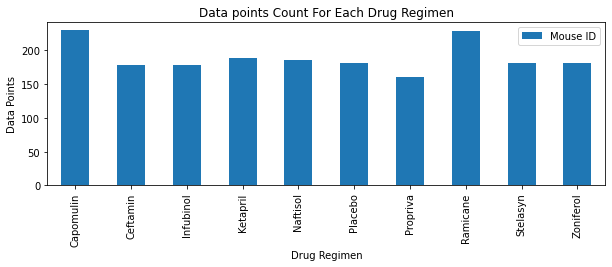

<Figure size 432x288 with 0 Axes>

In [480]:
# Bar Chart
drg_dat.plot(kind="bar", figsize=(10,3))
plt.ylabel("Data Points")
plt.title("Data points Count For Each Drug Regimen")
plt.show()
plt.tight_layout()

In [481]:
# Bar plot for each treatment regimen --- pyplot
list_drg = sum_stats.index.tolist()
list_drg

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [482]:
# Convert drug_count into a list
drg_cnt = (mous_std.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drg_cnt

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Data Points')

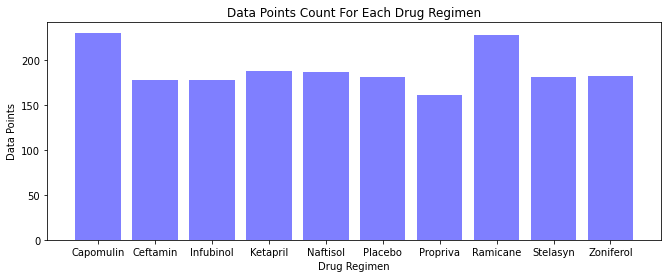

In [483]:
x_axis = np.arange(len(drg_cnt))
x_axis = list_drg
# Bar chart
plt.figure(figsize=(11,4))
plt.bar(x_axis, drg_cnt, color='b', alpha=0.5, align="center")

plt.title("Data Points Count For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

In [484]:
plt.clf()
plt.cla()
plt.close()

In [485]:
# Pie plot: female versus male mice
fem_mal = pd.DataFrame(mous_std.groupby(["Sex"]).count()).reset_index()
fem_mal.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [486]:
# Sex and Mouse ID dataframe
fem_mal = fem_mal[["Sex","Mouse ID"]]
fem_mal.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


In [487]:
# Pie Chart --- Pandas

Text(0, 0.5, '')

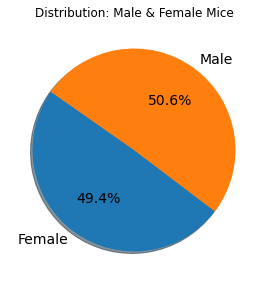

In [469]:
plt.figure(figsize=(10,8))
ax1 = plt.subplot(121, aspect="equal")
fem_mal.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=145, shadow=True, labels=fem_mal["Sex"], legend = False, fontsize=14)

plt.title("Distribution: Male & Female Mice")
plt.xlabel("")
plt.ylabel("")

In [395]:
# Matplotlib pyplot - Pie Chart

In [396]:
plt.clf()
plt.cla()
plt.close()

In [397]:
# Pie plot: female versus male mice --- pyplot
ctfem_mal = (mous_std.groupby(["Sex"])["Age_months"].count()).tolist()
ctfem_mal

[935, 958]

In [401]:
# Pie Chart Details
labels = ["Females", "Males"]
colors = ["purple", "orange"]
explode = (0.1, 0)

(-1.190022637646879,
 1.112955339938407,
 -1.2254561692872417,
 1.1150985725624567)

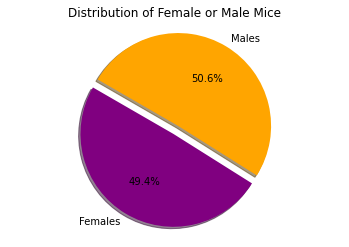

In [462]:
#creating the pie chart
plt.pie(ctfem_mal, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Distribution of Female or Male Mice")
plt.axis("equal")

In [400]:
plt.clf()
plt.cla()
plt.close()

In [361]:
# Quartiles, IQR, Potential Outliers Across All 4 Treatment Regimens
# Tumor volume treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
mous_std.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [362]:
# Sorting by "Drug Regimen", "Mouse ID" and "Timepoint" columns
col_sort = mous_std.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
sort_fin = col_sort.loc[sorted_df["Timepoint"] == 45]
sort_fin.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [363]:
# Capomulin
capmln_drug = sort_fin[sort_fin["Drug Regimen"].isin(["Capomulin"])]
capmln_drug.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [365]:
# Changing "Tumor Volume (mm3)" column to a dataframe object
capmln_regmn = capmln_drug.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capmln_regmn = capmln_regmn["Tumor Volume (mm3)"]
capmln_regmn

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [404]:
# Quartile 
quartiles = capmln_regmn.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"Capomulin IQR data is:")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartile Range: {iqr}")
print(f"Median: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulin IQR data is:
Lower quartile: 32.37735684
Upper quartile: 40.1592203
Interquartile Range: 7.781863460000004
Median: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


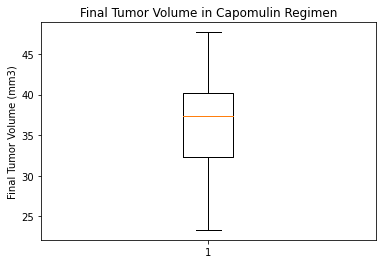

In [367]:
# Box Plot: Tumor Volume
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capmln_regmn)
plt.show()

In [368]:
# Ramicane
ramicn_drug = sort_fin[sort_fin["Drug Regimen"].isin(["Ramicane"])]
ramicn_drug.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [369]:
# Convert "Tumor Volume (mm3)" column inta dataframe object
ramcn_regmn = ramicn_drug.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramcn_regmn = ramcn_regmn["Tumor Volume (mm3)"]
ramcn_regmn

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [406]:
# Quartile calculations
quartiles = ramcn_regmn.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"Ramicane IQR data is:")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartile Range: {iqr}")
print(f"Median: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ramicane IQR data is:
Lower quartile: 30.981175224999998
Upper quartile: 38.508305307499995
Interquartile Range: 7.527130082499998
Median: 34.848627300000004
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


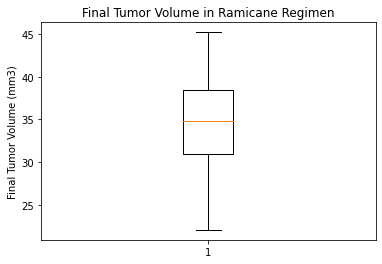

In [371]:
# Box plot: Tumor volume 
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Ramicane Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(ramcn_regmn)
plt.show()

In [372]:
# Infubinol Regimen
infbnl_drug = sort_fin[sort_fin["Drug Regimen"].isin(["Infubinol"])]
infbnl_drug.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [373]:
# Convert "Tumor Volume (mm3)" column to dataframe
infbnl_regmn = infbnl_data.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infbnl_regmn = infbnl_regmn["Tumor Volume (mm3)"]
infbnl_regmn

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [407]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = infbnl_regmn.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"Infubinol IQR data is:")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartile Range: {iqr}")
print(f"Median: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Infubinol IQR data is:
Lower quartile: 62.75445141
Upper quartile: 67.68556862
Interquartile Range: 4.9311172099999965
Median: 66.08306589
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


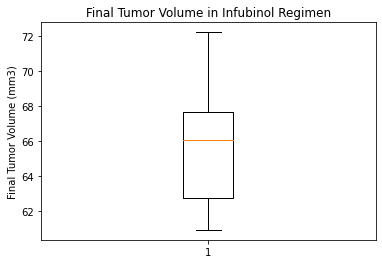

In [265]:
# Box plot: Tumor volume 
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Infubinol Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(infbnl_regmn)
plt.show()

In [266]:
# Ceftamin
ceftmn_drug = sort_fin[sort_fin["Drug Regimen"].isin(["Ceftamin"])]
ceftmn_drug.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [267]:
# Convert column "Tumor Volume (mm3)" into a dataframe object
ceftmn_regmn = ceftmn_drug.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceftmn_regmn = ceftmn_regmn["Tumor Volume (mm3)"]
ceftmn_regmn

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [408]:
# Quartile calculations
quartiles = ceftmn_regmn.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"Ceftamin IQR data is:")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartile Range: {iqr}")
print(f"Median: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ceftamin IQR data is:
Lower quartile: 61.43389223
Upper quartile: 67.52748237
Interquartile Range: 6.093590140000003
Median: 64.29983003
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


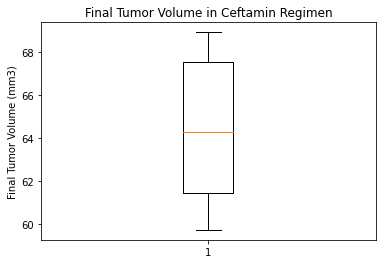

In [283]:
# Box plot: Tumor volume
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Ceftamin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(ceftmn_regmn)
plt.show()

In [ ]:
# First Option to create the Boxplots

In [453]:
df = pd.DataFrame({'Capomulin': capmln_regmn, 'Ramicane':ramcn_regmn, 'Infubinol':infbnl_regmn,'Ceftamin':ceftmn_regmn})
df.axes
df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,60.918767,59.741901
1,28.430964,29.128472,62.435404,59.851956
2,28.484033,30.276232,62.754451,61.386660
3,31.023923,30.564625,65.525743,61.433892
4,31.896238,30.638696,66.083066,61.849023


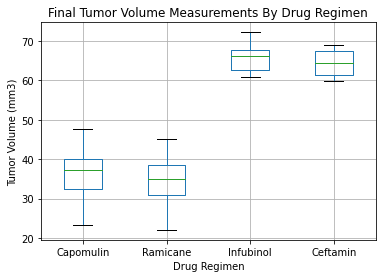

In [461]:
plt.title('Final Tumor Volume Measurements By Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
fig = df.boxplot()
plt.show(fig)

In [ ]:
# Other Option to create multiple Boxplots in one figure:

In [324]:
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly as np  

In [411]:
import plotly.offline as pyo

data0 = go.Box(
        y = capmln_regmn,
        name = "Capmoulin"
)
data1 = go.Box(
        y = ramcn_regmn,
        name = "Ramicane"
)
data2 = go.Box(
        y = infbnl_regmn,
        name = "Infubinol"
)
data3 = go.Box(
        y = ceftmn_regmn,
        name = "Ceftamin"
)
data = [data0, data1, data2, data3]
layout = go.Layout(title = "Treatment Regimen for the Tumor Volume")
fig = go.Figure(data = data, layout=layout)
pyo.plot(fig)


    

'temp-plot.html'

In [ ]:
# This also creates the 4 Boxplots in one figure.

In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly as np

fig = go.Figure()
fig.add_trace(go.Box(
    y = capmln_regmn,
    name="Capmoulin",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(7,40,89)',
    line_color='rgb(7,40,89)'
))

fig.add_trace(go.Box(
    y=ramcn_regmn,
    name="Ramicane",
    boxpoints='outliers', #only ouliers
    marker_color='rgb(107,174,214)'
    ##line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=ceftmn_regmn,
    name="Influbinol",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219,64,82,0.6)',
        line=dict(
            outliercolor='rgba(219,64,82,0.6)',
            outlierwidth=2)),
    #line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=ceftmn_regmn,
    name="Ceftamin",
    boxpoints='outliers', # only outliers
    marker_color='rgb(107,174,214)',
    #line_color='rgb(8,81,156)'
))

fig.update_layout(title_text="Treatment Regimen for The Tumor Values")
fig.show()


In [193]:
# Line plot:  Time point Vs. Tumor Volume for mouse treated with Capomulin
capmul_data = mous_std.loc[mous_std["Drug Regimen"] == "Capomulin"]
capmul_data = capmul_data.reset_index()
capmul_data.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [375]:
# Single mouse data
msdata_cap = capmul_data.loc[capmul_data["Mouse ID"] == "s185"]
msdata_cap

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


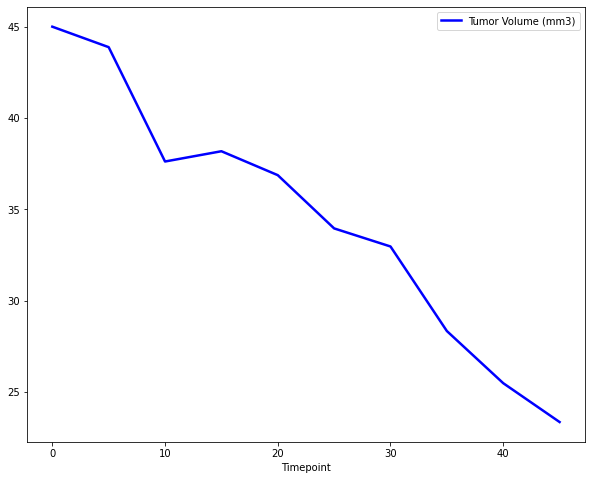

In [377]:
# Arrange data into two columns
msdata_cap = msdata_cap.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
# line plot: Tumor Volume for mice treated with Capomulin - Index reset
msdata_cap = msdata_cap.reset_index(drop=True)
msdata_cap.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="blue")

In [378]:
# Scatter plot: Mouse weight Vs. Average Tumor Volume for the Capomulin regimen
capmul_data.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [379]:
# Dataframe for Mouse ID, Weight (g), Tumor Volume (mm3)
weight_data = capmul_data.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_data.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [380]:
# Get average tumor volume for each mouse under the use of Capomulin
avgerage_capmul = pd.DataFrame(weight_data.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avgerage_capmul.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [381]:
# Rename "Tumor Volume (mm3)" column to "Average Volume"
average_capmul = avgerage_capmul.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_capmul.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


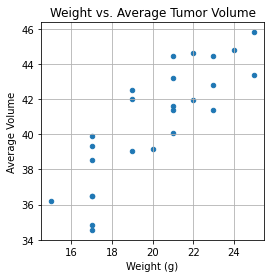

In [382]:
# Scatter plot:  Mouse weight Vs. Average Tumor Volume for Capomulin

average_capmul.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

In [206]:
plt.clf()
plt.cla()
plt.close()

In [207]:
# Drug: Capomulin Regimen 
# Correlation Coefficient and linear regression model 
# Data: Mouse weight and average tumor volume
mouse_weight = average_capmul.iloc[:,1]
average_tumor_volume = average_capmul.iloc[:,2]

In [208]:
mouse_weight.head()

0    22
1    21
2    17
3    19
4    22
Name: Weight (g), dtype: int64

In [209]:
average_tumor_volume.head()

0    41.963636
1    40.083699
2    36.505973
3    41.990097
4    44.613344
Name: Average Volume, dtype: float64

In [210]:
# Pearson Correlation Coefficient between Mouse Weight and Average Tumor Volume

corr, _= pearsonr(mouse_weight, average_tumor_volume)
print('Pearsons correlation: % .3f' % corr)

Pearsons correlation:  0.842


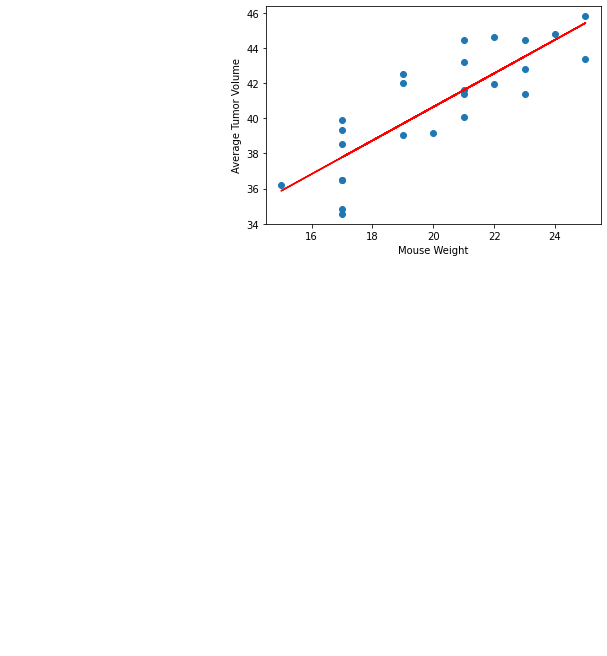

In [333]:
# import linregress
from scipy.stats import linregress

# Lineear regression Model Plot
# Scatter plot
x_values = average_capmul["Weight (g)"]
y_values = average_capmul["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="green")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()